In [3]:

import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pytesseract
import numpy as np
import os

(455, 276, 3)


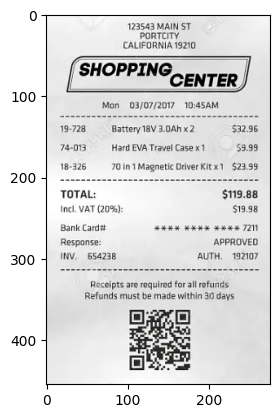

In [5]:
root_path = os.getcwd()
img_path = root_path+"\\test_imgs\\shop_invoice.png"
cv_img = cv2.imread(img_path)
print(cv_img.shape)
plt.imshow(cv_img)

(455, 276)


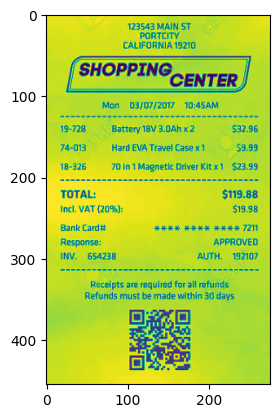

In [9]:
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
plt.imshow(gray_img) 

### Line Detection

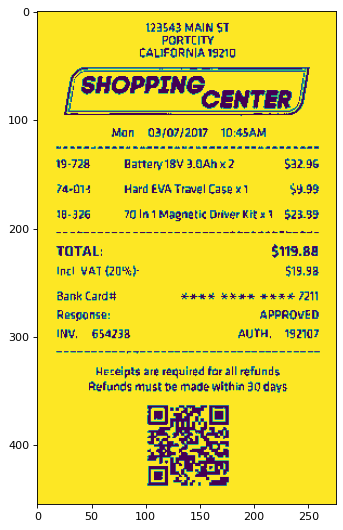

In [10]:
threshold_img = cv2.threshold(gray_img,50,100,8)[1]
figure(figsize=(10,8),dpi=80)
plt.imshow(threshold_img)

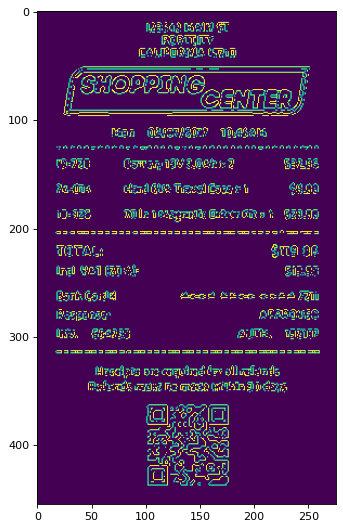

In [11]:
edges = cv2.Canny(threshold_img, 50, 200, None, 3)
figure(figsize=(10,8),dpi=80)
plt.imshow(edges)

In [22]:

import math


#lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 230  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(cv_img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print("No of lines : ",len(lines))
print(lines)

No of lines :  7
[[[ 18 313 260 313]]

 [[ 18 315 260 315]]

 [[ 18 125 259 125]]

 [[ 18 205 259 205]]

 [[ 18 203 259 203]]

 [[ 24 126 259 126]]

 [[ 17 204 259 204]]]


In [24]:
print(lines[0][0][0])

18


In [27]:
actual_lines = []
actual_points =[]
y_distance = 20



for line in lines:
    for x1,y1,x2,y2 in line:
   
        if len(actual_lines) == 0:
            #add first line point
            actual_lines.append(y1)
            actual_points.append([x1,y1,x2,y2])
           
        else:
            is_needAdd =True
            for actual_y in actual_lines:
                # first line and second line must be a least y_distance
                if(np.abs(actual_y-y1) < y_distance):
                    is_needAdd = False
                    break
            
            if is_needAdd:
                actual_lines.append(y1)   
                actual_points.append([x1,y1,x2,y2])

print(actual_lines)
print(actual_points)

[np.int32(313), np.int32(125), np.int32(205)]
[[np.int32(18), np.int32(313), np.int32(260), np.int32(313)], [np.int32(18), np.int32(125), np.int32(259), np.int32(125)], [np.int32(18), np.int32(205), np.int32(259), np.int32(205)]]


[[np.int32(18), np.int32(313), np.int32(260), np.int32(313)], [np.int32(18), np.int32(125), np.int32(259), np.int32(125)], [np.int32(18), np.int32(205), np.int32(259), np.int32(205)]]


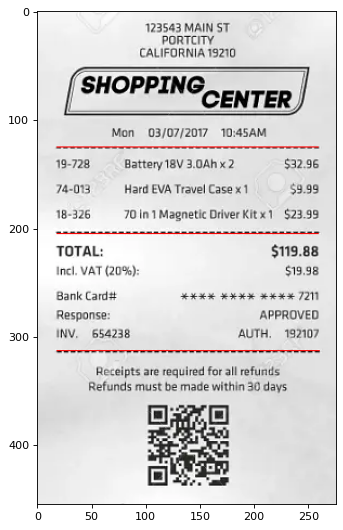

In [28]:
img_output = cv_img.copy()
print(actual_points)
for x1,y1,x2,y2 in actual_points:
    cv2.line(img_output,(x1,y1),(x2,y2),(255,0,0),1)
figure(figsize=(10,8),dpi=80)
plt.imshow(img_output)